# Implementing RMS prop from scratch

A problem with AdaGrad is that it can slow the search down too much, resulting in very small learning rates for each parameter or dimension of the search by the end of the run. 

This has the effect of stopping the search too soon, before the minimal can be located.

In [ ]:
RMSProp 
- an extension of AdaGrad in that it uses a decaying average or moving average of the partial derivatives instead of the sum in the calculation of
the learning rate for each parameter.
- This is achieved by adding a new hyperparameter we will call rho that acts like momentum for the partial derivatives.
- Using a decaying moving average of the partial derivative allows the search to forget early partial derivative values and focus on the most recently seen shape of the search space.

In [10]:
# Importing packages

from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot

In [6]:
# defining the objective function

def objective(x, y):
    return x**2.0 + y**2.0




In [12]:
# define derivative of the objective function


def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])

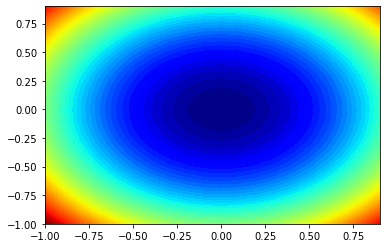

In [16]:
# plot the objective function
def objective(x, y):
    return x**2.0 + y**2.0

# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# show the plot
pyplot.show()


# How RMS prop works

- The first step is to calculate the gradient for the current solution using the derivative() function
- calculate the square of the partial derivative and update the decaying average of the squared partial derivatives with the “rho” hyperparameter.
- use the moving average of the squared partial derivatives and gradient to calculate the step size for the next point.
- We will do this one variable at a time, first calculating the step size for the variable, then the new value for the variable
-These values are built up in an array until we have a completely new solution that is in the steepest descent direction from the current point using the custom step sizes.
- This new solution can then be evaluated using the objective() function and the performance of the search can be reported



In [17]:
 #gradient descent algorithm with rmsprop

def rmsprop(objective, derivative, bounds, n_iter, step_size, rho):
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # list of the average square gradients for each variable
    sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent
    for it in range(n_iter):
        # calculate gradient
        gradient = derivative(solution[0], solution[1])
        # update the average of the squared partial derivatives
        for i in range(gradient.shape[0]):
            # calculate the squared gradient
            sg = gradient[i]**2.0
            # update the moving average of the squared gradient
            sq_grad_avg[i] = (sq_grad_avg[i] * rho) + (sg * (1.0-rho))
        # build a solution one variable at a time
        new_solution = list()
        for i in range(solution.shape[0]):
            # calculate the step size for this variable
            alpha = step_size / (1e-8 + sqrt(sq_grad_avg[i]))
            # calculate the new position in this variable
            value = solution[i] - alpha * gradient[i]
            # store this variable
            new_solution.append(value)
        # evaluate candidate point
        solution = asarray(new_solution)
        solution_eval = objective(solution[0], solution[1])
        # report progress
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return [solution, solution_eval]
 
                
            



In [19]:
# seed the pseudo random number generator
seed(1)

# define range for input

bounds = asarray([[-1.0, 1.0], [-1.0,1.0]])
#define total iterations
n_iter = 50
#define step size
step_size = 0.01
# momentum for rms_prop
rho = .99

# perform the gradient descent search algorithm

best, score = rmsprop(objective, derivative, bounds, n_iter, step_size, rho)
print('Done!')
print('f(%s) = %f' % (best,score))


>0 f([-0.06595602  0.340649  ]) = 0.12039
>1 f([-0.02886236  0.27929536]) = 0.07884
>2 f([-0.01276125  0.23417693]) = 0.05500
>3 f([-0.00562466  0.19863849]) = 0.03949
>4 f([-0.00246486  0.16964301]) = 0.02878
>5 f([-0.00107332  0.145492  ]) = 0.02117
>6 f([-0.00046434  0.12511178]) = 0.01565
>7 f([-0.00019955  0.10776512]) = 0.01161
>8 f([-8.51860635e-05  9.29147925e-02]) = 0.00863
>9 f([-3.61188240e-05  8.01516212e-02]) = 0.00642
>10 f([-1.52095444e-05  6.91533161e-02]) = 0.00478
>11 f([-6.36034309e-06  5.96594573e-02]) = 0.00356
>12 f([-2.64113212e-06  5.14554696e-02]) = 0.00265
>13 f([-1.08894956e-06  4.43619097e-02]) = 0.00197
>14 f([-4.45754295e-07  3.82270235e-02]) = 0.00146
>15 f([-1.81140176e-07  3.29213925e-02]) = 0.00108
>16 f([-7.30678086e-08  2.83339599e-02]) = 0.00080
>17 f([-2.92542666e-08  2.43689933e-02]) = 0.00059
>18 f([-1.16242022e-08  2.09437034e-02]) = 0.00044
>19 f([-4.58359298e-09  1.79863337e-02]) = 0.00032
>20 f([-1.79339171e-09  1.54345976e-02]) = 0.00024
>21